In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Function to take photo
def takePhoto(fileName):
    camera = cv2.VideoCapture(0)
    if not camera.isOpened():
        return False
    
    while True:
        status, image = camera.read()
        cv2.imshow("Webcam",image)
        if status == False:
            camera.release()
            return False
            
        keyPressed = cv2.waitKey(1)
        if keyPressed>-1:
            cv2.imwrite(fileName,image)
            break

    #cv2.imshow("Window",image)
    camera.release()
    
    cv2.destroyAllWindows()
    return fileName
    
def getImage():
    dataSet = os.listdir("Data Set")
    #print(len(dataSet))
    category = dataSet[random.randint(0,len(dataSet)-1)]
    images = os.listdir(os.path.join("Data Set/"+category))
    return "Data Set/"+category+"/"+images[random.randint(0,len(images))]

In [3]:
model = tf.keras.models.load_model("./model.keras")

AxesImage(shape=(480, 640, 3))
1/1 [==============================] - 0s 31ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 3.786542e-19 0.000000e+00
  1.000000e+00]]
Pen  : Rs. 5


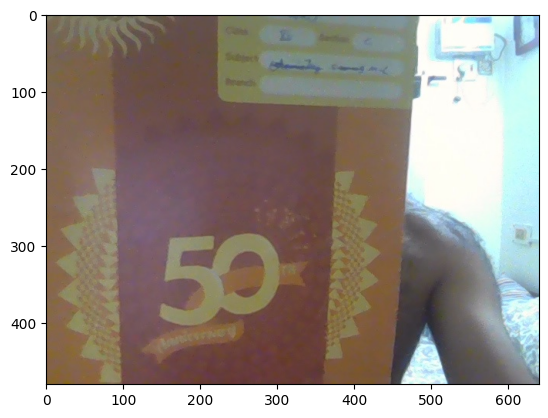

In [6]:
#print(getImage())
fileName = "inputImg.jpg"
takePhoto(fileName)
inputImage = cv2.cvtColor(cv2.imread(fileName),cv2.COLOR_BGR2RGB)
di = {0 : ("Apple",25), 1 : ("Banana",10), 2 : ("Book",75), 3 : ("Bottle",150), 
      4: ("Horlicks",80), 5: ("Pen",5)}

x = 0
image = cv2.resize(inputImage, (256,256)).reshape(1,256,256,3)
#cv2.imshow("New image", inputImage)
print(plt.imshow(inputImage))
res  = model.predict(image, batch_size=1)
maxIndex = 0
print(res)
for i in range(len(res[0])):
  if res[0][i]>res[0][maxIndex]:
    maxIndex = i


print(di[maxIndex][0]," : Rs.",di[maxIndex][1])